In [1]:
import pandas as pd

# Define the file paths for each month's data
file_paths = [
    '202406-citibike-tripdata_1.csv',
    '202406-citibike-tripdata_2.csv',
    '202406-citibike-tripdata_3.csv',
    '202406-citibike-tripdata_4.csv',
    '202406-citibike-tripdata_5.csv'
]

# Load and combine the datasets
data_frames = [pd.read_csv(file_path) for file_path in file_paths]
citibike_data = pd.concat(data_frames, ignore_index=True)

# Display the first few rows of the combined dataset
print(citibike_data.head())


/var/folders/yh/wt89cp_n00zc5wpkkv_s7wrw0000gn/T/ipykernel_16449/1326536781.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames = [pd.read_csv(file_path) for file_path in file_paths]
/var/folders/yh/wt89cp_n00zc5wpkkv_s7wrw0000gn/T/ipykernel_16449/1326536781.py:13: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames = [pd.read_csv(file_path) for file_path in file_paths]
/var/folders/yh/wt89cp_n00zc5wpkkv_s7wrw0000gn/T/ipykernel_16449/1326536781.py:13: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames = [pd.read_csv(file_path) for file_path in file_paths]
/var/folders/yh/wt89cp_n00zc5wpkkv_s7wrw0000gn/T/ipykernel_16449/1326536781.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames = [pd.read_csv(file_path) for file_path in 

            ride_id  rideable_type               started_at  \
0  A38B171B6C31691A  electric_bike  2024-06-12 17:47:23.952   
1  77E13C9D6559EA56  electric_bike  2024-06-04 16:48:42.876   
2  EA6418AD826D19D9  electric_bike  2024-06-01 13:36:28.502   
3  121CF2548FB65A29   classic_bike  2024-06-01 03:12:09.636   
4  E6BE7FD2809649D6  electric_bike  2024-06-08 13:14:31.197   

                  ended_at           start_station_name start_station_id  \
0  2024-06-12 17:50:27.312              E 89 St & 3 Ave          7265.10   
1  2024-06-04 17:01:46.672  Pier 40 - Hudson River Park          5696.03   
2  2024-06-01 13:52:55.912              W 44 St & 5 Ave          6551.02   
3  2024-06-01 03:16:29.531      Graham Ave & Withers St          5403.04   
4  2024-06-08 13:24:09.858               E 9 St & Ave C          5616.01   

               end_station_name end_station_id  start_lat  start_lng  \
0               1 Ave & E 94 St        7286.05  40.780499 -73.952185   
1               W 25

In [2]:
# Display dataset information
print(citibike_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4783576 entries, 0 to 4783575
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 474.4+ MB
None


In [3]:
# Check the column name
print(citibike_data.columns)

# Inspect the first few rows
print(citibike_data.head())

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
            ride_id  rideable_type               started_at  \
0  A38B171B6C31691A  electric_bike  2024-06-12 17:47:23.952   
1  77E13C9D6559EA56  electric_bike  2024-06-04 16:48:42.876   
2  EA6418AD826D19D9  electric_bike  2024-06-01 13:36:28.502   
3  121CF2548FB65A29   classic_bike  2024-06-01 03:12:09.636   
4  E6BE7FD2809649D6  electric_bike  2024-06-08 13:14:31.197   

                  ended_at           start_station_name start_station_id  \
0  2024-06-12 17:50:27.312              E 89 St & 3 Ave          7265.10   
1  2024-06-04 17:01:46.672  Pier 40 - Hudson River Park          5696.03   
2  2024-06-01 13:52:55.912              W 44 St & 5 Ave          6551.02   
3  2024-06-01 03:16:29.531      Graham Ave & Withers St          54

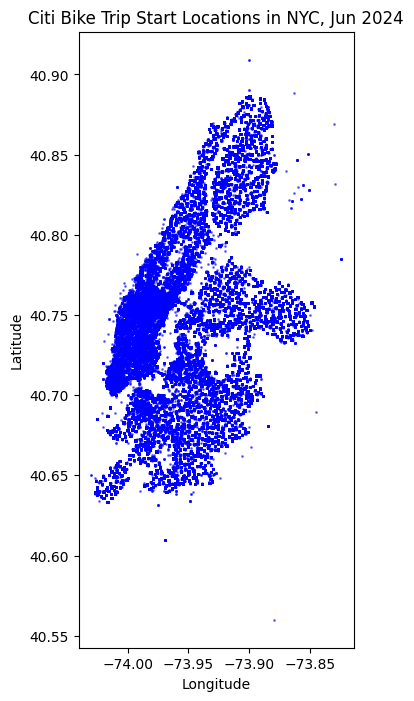

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    citibike_data, 
    geometry=gpd.points_from_xy(citibike_data.start_lng, citibike_data.start_lat),
    crs="EPSG:4326"
)

# Plotting the start locations of bike trips
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, markersize=1, color='blue', alpha=0.5)
plt.title("Citi Bike Trip Start Locations in NYC, Jun 2024")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Index(['geometry'], dtype='object')
            ride_id  rideable_type               started_at  \
0  A38B171B6C31691A  electric_bike  2024-06-12 17:47:23.952   
1  77E13C9D6559EA56  electric_bike  2024-06-04 16:48:42.876   
2  EA6418AD826D19D9  electric_bike  2024-06-01 13:36:28.502   
3  121CF2548FB65A29   classic_bike  2024-06-01 03:12:09.636   
4  E6BE7FD2809649D6  electric_bike  2024-06-08 13:14:31.197   

                  ended_at           start_station_name start_station_id  \
0  2024-06-12 17:50:27.312              E 89 St & 3 Ave          7265.10   
1  2024-06-04 17:01:46.672  Pier 40 - Hudson River Park          5696.03   
2  2024-06-01 13:52:55.912              W 44 St & 5 Ave          6551.02   
3  2024-06-01 03:16:29.531      Graham Ave & Withers St          5403.04   
4  2024-06-08 13:24:09.858               E 9 St & Ave C          5616.01   

               end_station_name end_station_id  start_lat  start_lng  \
0               1 Ave & E 94 St        7286.05  40.78049

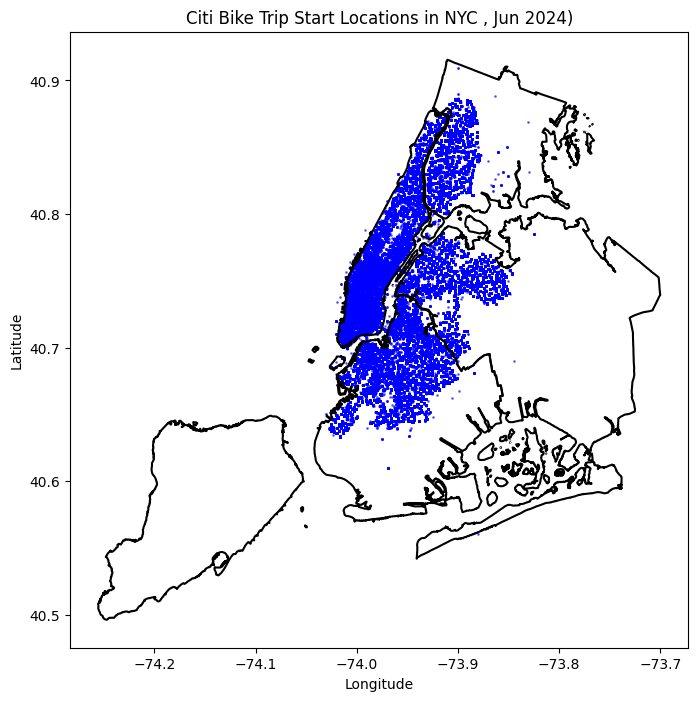

In [5]:
import os


# Path to the shapefile
shapefile_path = "geo_export_1e6dc4ca-9607-430b-80bd-ed6af1dff0a8.shp"
if os.path.exists(shapefile_path):
    try:
        shapefile = gpd.read_file(shapefile_path)
        
        # Print the columns of the shapefile to inspect its structure
        print(shapefile.columns)

        # Check if the shapefile has a CRS set
        if shapefile.crs is None:
            # If no CRS is set, you need to set it manually (adjust EPSG code as needed)
            shapefile = shapefile.set_crs("EPSG:4326")

        # Ensure the shapefile is in the same CRS as the Citi Bike data
        shapefile = shapefile.to_crs("EPSG:4326")

        # Convert the DataFrame to a GeoDataFrame
        gdf = gpd.GeoDataFrame(
            citibike_data, 
            geometry=gpd.points_from_xy(citibike_data.start_lng, citibike_data.start_lat),
            crs="EPSG:4326"
        )

        # Check the GeoDataFrame
        print(gdf.head())

        # Ensure all geometries are valid
        gdf = gdf[gdf.is_valid]

        # Plotting the start locations of bike trips on the shapefile base map
        fig, ax = plt.subplots(figsize=(12, 8))
        shapefile.boundary.plot(ax=ax, color='black')
        gdf.plot(ax=ax, markersize=1, color='blue', alpha=0.5)
        plt.title("Citi Bike Trip Start Locations in NYC , Jun 2024)")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()

    except Exception as e:
        print(f"Error processing shapefile with GeoPandas: {e}")
else:
    print(f"Shapefile '{shapefile_path}' does not exist.")


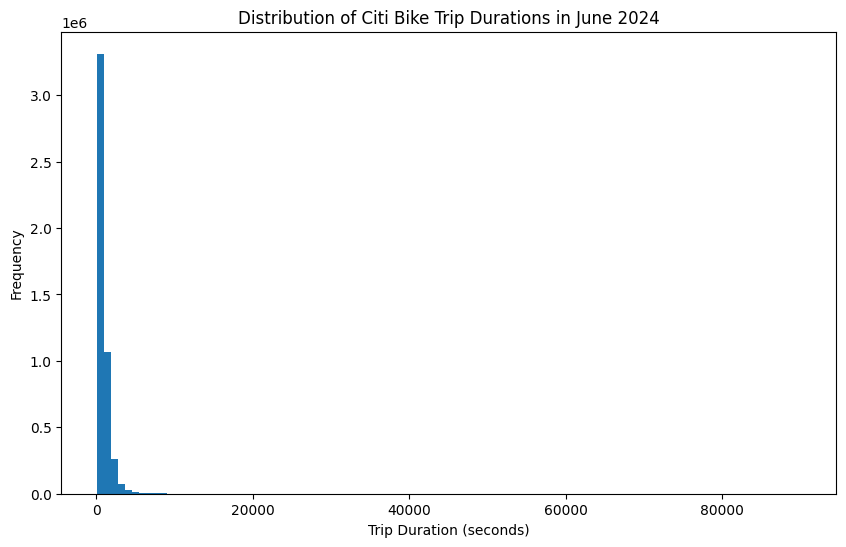

In [6]:
# Convert 'started_at' and 'ended_at' to datetime with errors='coerce'
citibike_data['started_at'] = pd.to_datetime(citibike_data['started_at'], errors='coerce')
citibike_data['ended_at'] = pd.to_datetime(citibike_data['ended_at'], errors='coerce')

# Drop rows with NaT values in 'started_at' or 'ended_at'
citibike_data.dropna(subset=['started_at', 'ended_at'], inplace=True)

# Calculate trip duration in seconds
citibike_data['trip_duration'] = (citibike_data['ended_at'] - citibike_data['started_at']).dt.total_seconds()

# Plotting the trip duration distribution
fig, ax = plt.subplots(figsize=(10, 6))
citibike_data['trip_duration'].plot(kind='hist', bins=100, ax=ax)
plt.title("Distribution of Citi Bike Trip Durations in June 2024")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

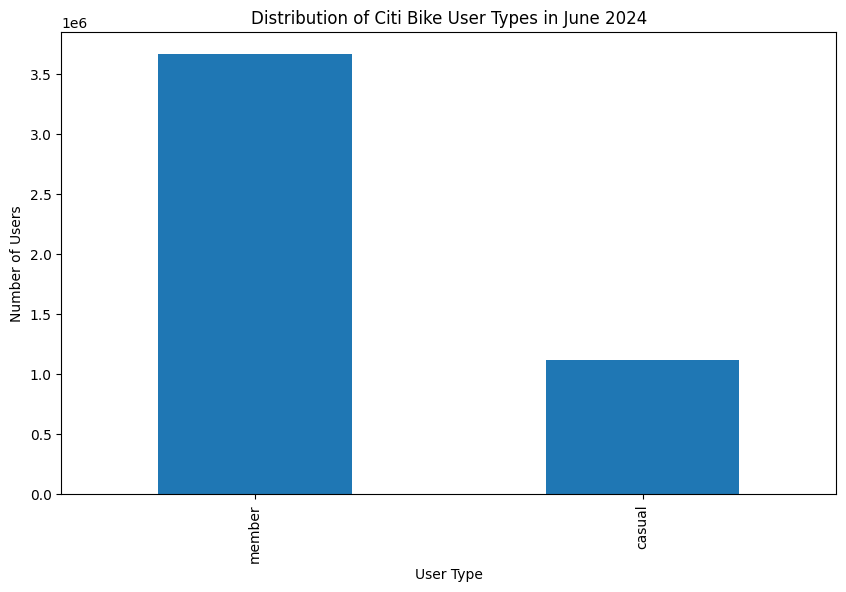

In [7]:
# Count the number of member type
user_counts = citibike_data['member_casual'].value_counts()

# Plotting the user type distribution
fig, ax = plt.subplots(figsize=(10, 6))
user_counts.plot(kind='bar', ax=ax)
plt.title("Distribution of Citi Bike User Types in June 2024")
plt.xlabel("User Type")
plt.ylabel("Number of Users")
plt.show()

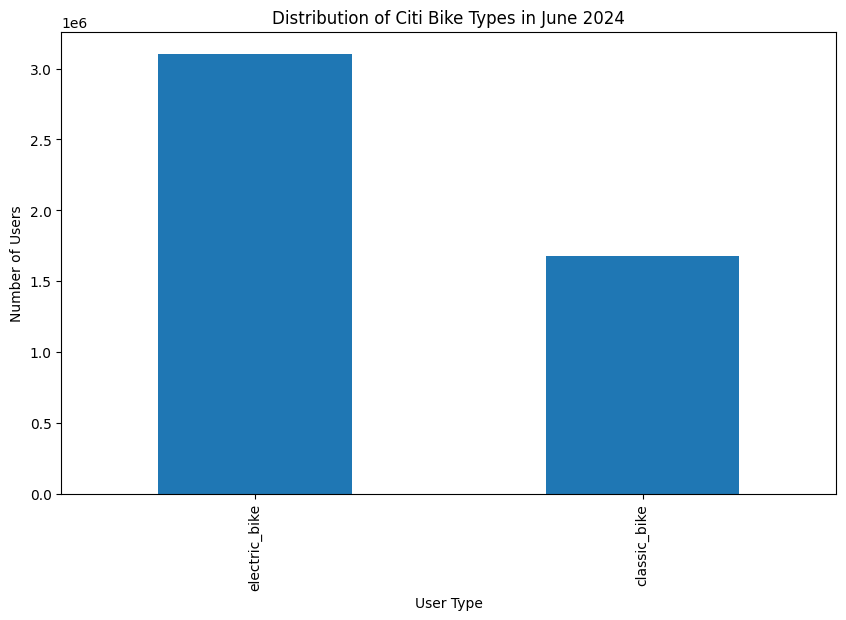

In [8]:
# Count the number of each bike type
user_counts = citibike_data['rideable_type'].value_counts()

# Plotting the user type distribution
fig, ax = plt.subplots(figsize=(10, 6))
user_counts.plot(kind='bar', ax=ax)
plt.title("Distribution of Citi Bike Types in June 2024")
plt.xlabel("User Type")
plt.ylabel("Number of Users")
plt.show()

In [9]:
# Save the combined dataset to a CSV file
output_file = "citibike_trip_datai_june 2024.csv"
citibike_data.to_csv(output_file, index=False)


##Using the Map_Pluto

* It's not work as the pluto layer have another data

            ride_id  rideable_type              started_at  \
0  A38B171B6C31691A  electric_bike 2024-06-12 17:47:23.952   
1  77E13C9D6559EA56  electric_bike 2024-06-04 16:48:42.876   
2  EA6418AD826D19D9  electric_bike 2024-06-01 13:36:28.502   
3  121CF2548FB65A29   classic_bike 2024-06-01 03:12:09.636   
4  E6BE7FD2809649D6  electric_bike 2024-06-08 13:14:31.197   

                 ended_at           start_station_name start_station_id  \
0 2024-06-12 17:50:27.312              E 89 St & 3 Ave          7265.10   
1 2024-06-04 17:01:46.672  Pier 40 - Hudson River Park          5696.03   
2 2024-06-01 13:52:55.912              W 44 St & 5 Ave          6551.02   
3 2024-06-01 03:16:29.531      Graham Ave & Withers St          5403.04   
4 2024-06-08 13:24:09.858               E 9 St & Ave C          5616.01   

               end_station_name end_station_id  start_lat  start_lng  \
0               1 Ave & E 94 St        7286.05  40.780499 -73.952185   
1               W 25 St & 9 Ave 

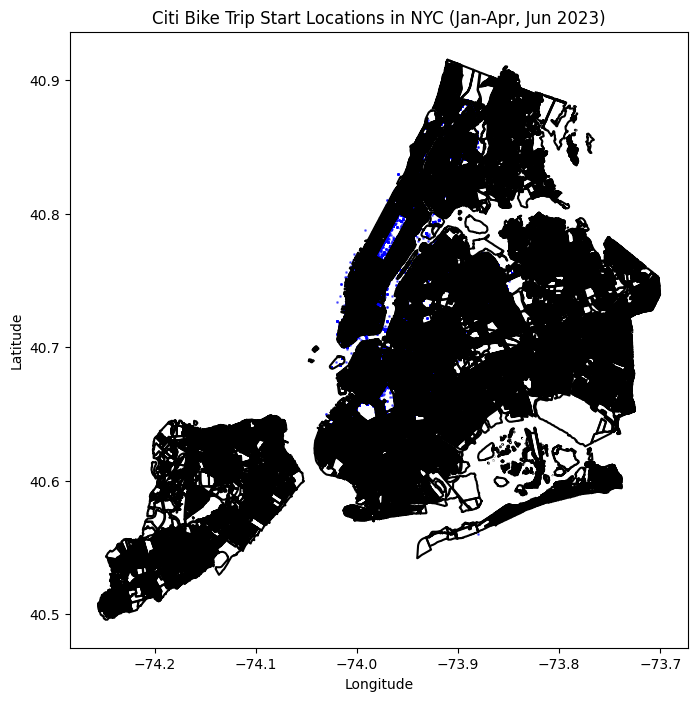

In [10]:
# Load MapPLUTO shapefile
mappluto_path = "../Data/nyc_mappluto_24v1_1_shp/MapPLUTO.shp"
mappluto = gpd.read_file(mappluto_path)

# Ensure MapPLUTO is in the same CRS as the Citi Bike data
mappluto = mappluto.to_crs("EPSG:4326")

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    citibike_data, 
    geometry=gpd.points_from_xy(citibike_data.start_lng, citibike_data.start_lat),
    crs="EPSG:4326"
)

# Check the GeoDataFrame
print(gdf.head())

# Ensure all geometries are valid
gdf = gdf[gdf.is_valid]

# Plotting the start locations of bike trips on the MapPLUTO base map
fig, ax = plt.subplots(figsize=(12, 8))
mappluto.boundary.plot(ax=ax, color='black')
gdf.plot(ax=ax, markersize=1, color='blue', alpha=0.5)
plt.title("Citi Bike Trip Start Locations in NYC (Jan-Apr, Jun 2023)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()